In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Problème du Toboggan #

## Mise en équation

On se donne le problème suivant:
Calculer le temps mis par une bille pour descendre un toboggan.

On considère un toboggan, dont la forme est donnée par une fonction $y$ : $[0,1]\rightarrow \mathbb{R}$. On suppose que  $y(0) =0$ et $y (1) =1$, l'axe des ordonnées étant dirigé vers le bas. On lache une bille du haut c'est à dire à partir de $(0,0)$ et on calcule le temps mis pour qu'elle atteigne le point $(1,1)$. C'est à dire tout en bas.

La bille étant considérée de masse m et le toboggan ayant une forme $y = y(x)$. En négligeant les frottements, on peut considérer que l'énergie mécanique est constante au cours du temps, c'est à dire:

$$ E = E_c +E_p $$ où 

$$
E_{c}=\frac{1}{2}m(\frac{\mathrm{d}s}{\mathrm{d}t})^{2}
$$

et 

$$
E_{p}=-mgy(x(t))\ .
$$

La conservation de l'énergie totale entre les instants $t=0$, initial, et $t=T(y)$ , où la bille arrive au bas du toboggan, nous donne 
$$
\frac{1}{2}m(\frac{\mathrm{d}s}{\mathrm{d}t})^{2}-mgy=0,
$$
d'où $s'(t)=\sqrt{2gy}$. Le temps de descente est alors donné par
$$
T(y)\ =\int_{0}^{T(y)}\mathrm{d}t=\int_{0}^{\ell(y)}\frac{\mathrm{d}s}{\sqrt{2gy}}=\int_{0}^{1}\frac{\sqrt{1+y'(x)^{2}}}{\sqrt{2gy(x)}}\mathrm{d}x.
$$

In [2]:
def y(x):
    z = (x ** (0.25)) * (5 + x) ** 2 
    return z / 36


In [3]:
N = 1000
xx = linspace(0, 1, N)
yy = y(xx)

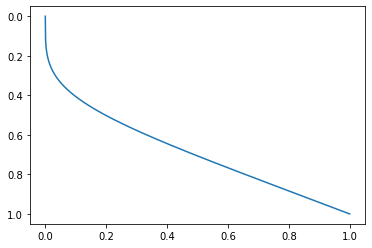

In [4]:
gca().invert_yaxis()
plot(xx, yy)

On pose $f(x) = \frac{\sqrt{1+y'(x)^{2}}}{\sqrt{2gy(x)}}$

In [5]:
def yp(x):
    return ((5 + x) ** 2) / (4 * 36 * x ** 0.75) + (x ** 0.25) * (5 + x)  / 18

In [6]:
def f(x):
    return sqrt((1 + yp(x) ** 2) / (2 * 10 * y(x)))

## Calcul approché par la méthode du Rectangle droite

In [7]:
def rectdroite(z, n):
    x = arange(n)
    return 1 / n * sum (z((x + 1) / n))

In [8]:
def f_test1(x):
    return x ** (- 0.75)

In [9]:
err = []
Nmax = 10 ** arange(8)
for i in Nmax:
    err.append(abs(rectdroite(f_test1, i) - 4))

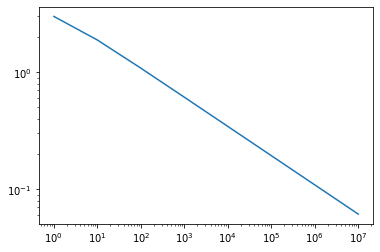

In [10]:
loglog(Nmax, err)

In [11]:
polyfit(log(Nmax), log(err), 1)

array([-0.24429098,  1.16875179])

In [12]:
def f_test2(x):
    return x ** (- 0.25)

In [13]:
err = []
Nmax = 10 ** arange(8)
for i in Nmax:
    err.append(abs(rectdroite(f_test2, i) - 4 / 3))

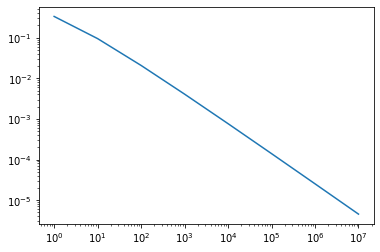

In [14]:
loglog(Nmax, err)

In [15]:
polyfit(log(Nmax), log(err), 1)

array([-0.70463911, -0.79413246])

## Calcul approché par la méthode du point milieu

In [16]:
def ptmilieu(z, n):
    x = arange(n)
    return 1 / n * sum (z((2 * x + 1) / (2 * n)))

Si on suppose que  $f$ s'écrit sous la forme $f(x) =x^{-\beta}+g(x)$  où $g$ est régulière, alors la méthode du point milieu est d'ordre $1-\beta$ avec $0 < \beta < 1$. Et c'est ce qu'on remarque en faisant les approximatins suivantes pour les cas tests simples suivant:

In [17]:
err = []
Nmax = 10 ** arange(8)
for i in Nmax:
    err.append(abs(ptmilieu(f_test1, i) - 4))

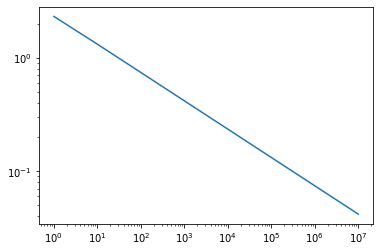

In [18]:
loglog(Nmax, err)

In [19]:
polyfit(log(Nmax), log(err), 1)

array([-0.24955875,  0.84772675])

In [20]:
err = []
Nmax = 10 ** arange(8)
for i in Nmax:
    err.append(abs(ptmilieu(f_test2, i) - 4 / 3))

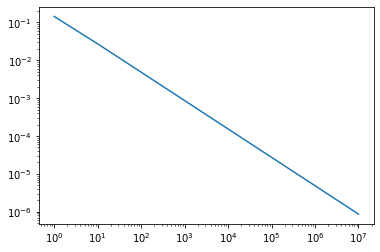

In [21]:
loglog(Nmax, err)

In [22]:
polyfit(log(Nmax), log(err), 1)

array([-0.74752863, -1.90020028])

In [23]:
def f_test3(x):
    return (1 + x ** 2) * x ** (- 0.75)

In [24]:
err = []
Nmax = 10 ** arange(8)
for i in Nmax:
    err.append(abs(ptmilieu(f_test3, i) - 40 / 9))

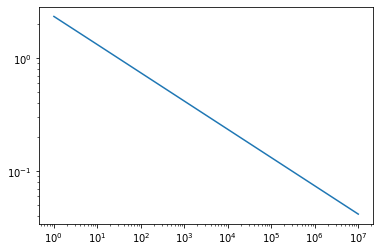

In [25]:
loglog(Nmax, err)

In [26]:
polyfit(log(Nmax), log(err), 1)

array([-0.24993862,  0.85211038])

### Preuve de l'estimation de l'erreur ###

#### Propsition ####
Si on suppose que  $f$ s'écrit sous la forme $f(x) =x^{-\beta}+g(x)$  où $g$ est régulière, alors la méthode du point milieu est d'ordre $1-\beta$ avec $0 < \beta < 1$. 

#### Preuve ####

Soit $T  = \int_0^1 f(x) d x $, alors  $$\left|T -T_{N}\right| \leq \left|\int_{0}^{\frac{1}{N}}f(x)dx-\frac{1}{N}f(\frac{1}{2N})\right|+\left|\int_{\frac{1}{N}}^{1}f(x)dx-\frac{1}{N}\sum_{i=1}^{N-1}f(\frac{2i+1}{2N})\right|.$$

Le premier terme est un $\mathcal{O}(N^{\beta-1})$. Par ailleurs, l'estimation de l'erreur d'interpolation sur chaque sous-intervalle $\left(I_{i}=\left[\displaystyle \frac{i}{N},\ \frac{i+1}{N}\right]\right)_{(i\geq 1)}$ montre que le second terme est majoré par
$$
\frac{1}{N^{3}}\sum_{i=1}^{N-1}\Vert f''\Vert_{\infty,I_i}\leq\frac{1}{N^{3}}\sum_{i=1}^{N-1}\left(\frac{i}{N}\right)^{-2-\beta}+\frac{1}{N^{2}}\Vert g''\Vert_{\infty,[0,1]}=\mathcal{O}(N^{\beta-1})\ .
$$

## Méthode de Monte-Carlo ##

<ipython-input-5-41bdb0e8a6ad>:2: RuntimeWarning: divide by zero encountered in true_divide
  return ((5 + x) ** 2) / (4 * 36 * x ** 0.75) + (x ** 0.25) * (5 + x)  / 18


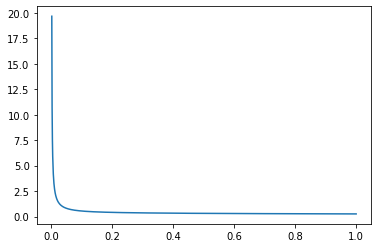

In [27]:
plot(xx, f(xx))

Si, $f : [0,1] \to [0,1]$. Donc le princie de la méthode est de tirer aléatoirement deux variables aléatoires $X_1$ et $X_2$ suivant la loi uniforme $\mathcal{U}([0,1])$ et de définir la vaiable alatoire $X \hookrightarrow \mathcal{B}(p)$ où $p$ est la probabilité que $X_2 < f(X_1)$. Ainsi, $\mathbb{E}(X) = p = \int_0^1 f(x) dx$.

In [29]:
def montecarlo(z, n):
    x1 = rand(n)
    x2 = rand(n)
    p = (x2 < z (x1)).astype(float)
    return mean(p)

In [30]:
seed(0)

In [31]:
def f_test4(x):
    return 1 / (1 + x ** 2)

In [35]:
err = []
Nmax = 10 ** arange(9)
for i in Nmax:
    err.append(abs(montecarlo(f_test4, i) - pi / 4))

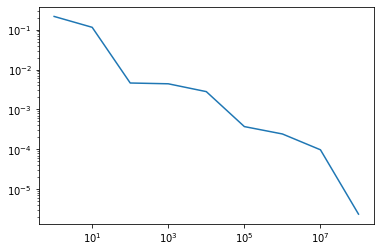

In [36]:
loglog(Nmax, err)

In [37]:
polyfit(log(Nmax), log(err), 1)

array([-0.54438747, -1.51922819])

Cette méthode n'est pas adaptée pour les fonctions avec des singularités sur le bord.

### Méthode de Quasi Monte-Carlo

Sous certaines condition on pourra démontrer que la suite $$ \frac1N \sum_{k = 1}^N f(x_k)  \longrightarrow \int_0^1 f(t) dt $$ où les $x_k$ sont i.i.d. de même loi $\mathcal{U}[0, 1]$.

In [63]:
def quasimontecarlo(z, n):
    x = rand(n)
    for i in range(n):
        if x[i] < 1 / n:
            x[i] = 1 /n
    return mean(z(x))

In [64]:
err = []
Nmax = 10 ** arange(8)
for i in Nmax:
    err.append(abs(quasimontecarlo(f_test1, i) - 4))

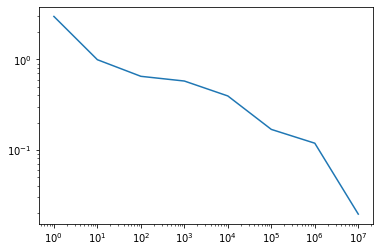

In [65]:
loglog(Nmax, err)

In [66]:
polyfit(log(Nmax), log(err), 1)

array([-0.26059999,  1.01512814])

In [67]:
err = []
Nmax = 10 ** arange(8)
for i in Nmax:
    err.append(abs(quasimontecarlo(f_test2, i) - 4 / 3))

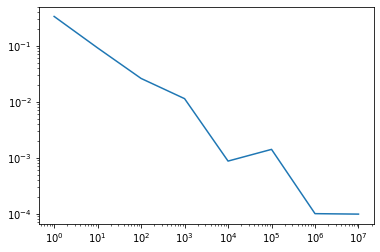

In [68]:
loglog(Nmax, err)

In [69]:
polyfit(log(Nmax), log(err), 1)

array([-0.52871749, -1.19591468])

On remarque que la convergence est comparable à celle de la méthode de Monte Carlo.

## Références
Ce TP est largement du texte de Grégory Vial:
http://perso.ec-lyon.fr/vial.gregory/Docs/Files/TextesAgreg/TpsDescente.pdf